In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from tensorflow.keras.utils import plot_model
import numpy as np
import os

C:\Users\Misha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 20
EPOCHS = 100

# Preparing train and test datasets

In [3]:
(train_ft, train_tg), (test_ft, test_tg) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.1, seed=113
)

val_ft = np.array(train_ft.tolist()[:50])
val_tg = np.array(train_tg.tolist()[:50])

train_ft = np.array(train_ft.tolist()[51:])
train_tg = np.array(train_tg.tolist()[51:])

print("Dataset loaded")
print(f'train:val:test={len(train_ft)}:{len(val_ft)}:{len(test_ft)}')


Dataset loaded
train:val:test=404:50:51


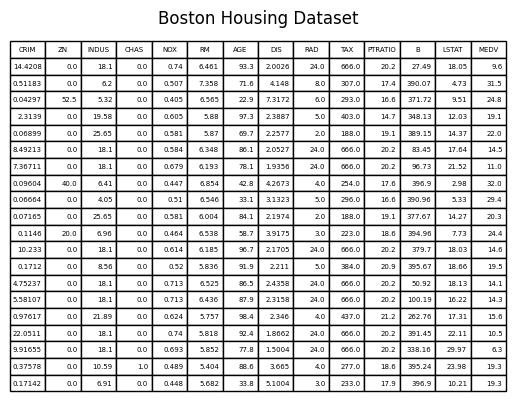

In [4]:
join_list = train_ft[:20].tolist()

for (index, _) in enumerate(join_list):
    join_list[index].append(train_tg[index])

plt.axis('off')
plt.title('Boston Housing Dataset')
df = pd.DataFrame(np.array(join_list),
    columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"],)
plt.table(cellText=df.values, colLabels=df.columns, loc='center')
plt.show()


# Defining Regression Model

In [5]:
max_value = (np.matrix(train_ft.tolist()).max()+1).astype(int)

def simpleRNN_regression_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(
        input_dim=max_value,
        output_dim=16,
        mask_zero=True))
    model.add(tf.keras.layers.SimpleRNN(16))
    model.add(tf.keras.layers.Dense(1))
    return model

model = simpleRNN_regression_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          11392     
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                528       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 11,937
Trainable params: 11,937
Non-trainable params: 0
_________________________________________________________________


# Training model

In [6]:
model.compile(optimizer='rmsprop', 
                loss='mse', 
                metrics=['mae'])

history = model.fit(train_ft, train_tg,
                    validation_data=(val_ft, val_tg),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE, verbose=1)

Epoch 1/100
21/21 [==============================] - 4s 36ms/step - loss: 523.5352 - mae: 20.9828 - val_loss: 424.8956 - val_mae: 18.5664
Epoch 2/100
21/21 [==============================] - 0s 14ms/step - loss: 459.4874 - mae: 19.4026 - val_loss: 385.9145 - val_mae: 17.4825
Epoch 3/100
21/21 [==============================] - 0s 13ms/step - loss: 424.4796 - mae: 18.4854 - val_loss: 359.4533 - val_mae: 16.7078
Epoch 4/100
21/21 [==============================] - 0s 11ms/step - loss: 398.4070 - mae: 17.7669 - val_loss: 337.2121 - val_mae: 16.0286
Epoch 5/100
21/21 [==============================] - 0s 11ms/step - loss: 375.9108 - mae: 17.1235 - val_loss: 318.1332 - val_mae: 15.4227
Epoch 6/100
21/21 [==============================] - 0s 11ms/step - loss: 355.8826 - mae: 16.5401 - val_loss: 300.5486 - val_mae: 14.8437
Epoch 7/100
21/21 [==============================] - 0s 10ms/step - loss: 337.9357 - mae: 15.9918 - val_loss: 285.7595 - val_mae: 14.3382
Epoch 8/100
21/21 [===============

# Evaluation Model results

In [7]:
metrics = model.evaluate(test_ft, test_tg, verbose=1)
metric_names = ['test_loss', 'test_mae']

for name, value in zip(metric_names, metrics):
    print(f'{name} : {value}')


2/2 [==============================] - 0s 5ms/step - loss: 40.2515 - mae: 3.8726
test_loss : 40.251461029052734
test_mae : 3.872589111328125


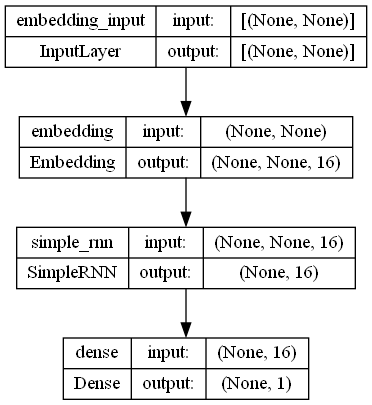

In [8]:
plot_model(model, show_shapes=True, expand_nested=True)


# Plotting train, test losses and accuracy

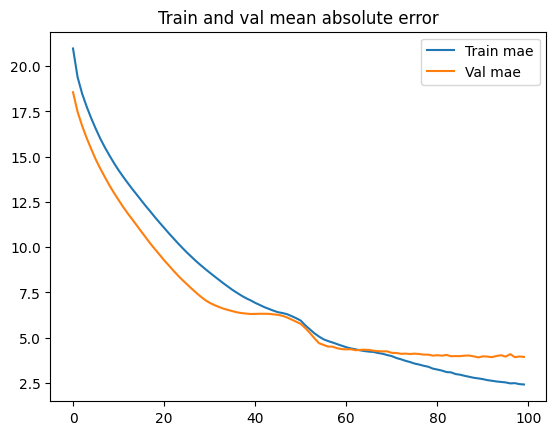

<Figure size 10000x10000 with 0 Axes>

In [9]:
plt.plot(history.history['mae'], label='Train mae')
plt.plot(history.history['val_mae'], label='Val mae')
plt.title('Train and val mean absolute error')
plt.legend()
plt.figure(figsize=(100, 100))
plt.show()


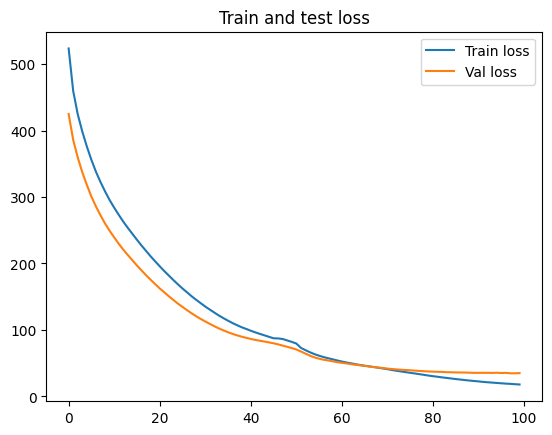

<Figure size 20000x20000 with 0 Axes>

In [10]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Train and test loss')
plt.legend()
plt.figure(figsize=(200, 200))
plt.show()
